# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

In [8]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats

In [9]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [10]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

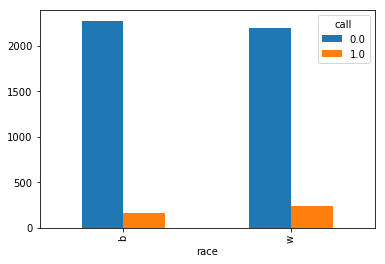

In [11]:
data.groupby(['race', 'call']).size().unstack().plot(kind='bar')

In [12]:
black_ratio = data[data.race=='b'].call.mean()
white_ratio = data[data.race=='w'].call.mean()

In [13]:
black_ratio

0.0644763857126236

In [14]:
white_ratio

0.09650924056768417

#### Hypotheses:

H0: There is no difference in the rate of callbacks between white and black applicants.

H1: There is a non-zero difference in the rate of callbacks between white and black applicants.

#### Two-sample test:

In [15]:
diff_var = ((black_ratio*(1-black_ratio)) / 2435 + (white_ratio*(1-white_ratio)) / 2435)**(1/2.0)
diff_var

0.00778337058606343

In [16]:
diff_var * 2.58

0.02008109611204365

In [17]:
z = (white_ratio - black_ratio) / diff_var
z

4.115550519002299

Using this test, the null hypothesis should be rejected at nearly any significance level.

#### One-sample test:

In [18]:
ratio = (white_ratio + black_ratio) / 2

In [19]:
diff_var = ((2 * ratio * (1 - ratio)) / 4870)**(1/2.0)
diff_var

0.005513236645121274

In [20]:
z = (white_ratio - black_ratio) / diff_var
z

5.810172302944191

Using this test, the null hypothesis should be rejected at nearly any significance level (even more than the last test).

### Conclusion:

There is a statistically significant difference in the callback rate between white-sounding and black-sounding names. Therefore, it is likely that race/name plays a pretty important role in callback success. However, in order to determine whether or not race is the most important factor, we would have to conduct tests on the other factors as well to see how important those factors are as well.